In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve
import seaborn as sns

In [2]:
sns.set(font_scale=1.5)
sns.set_style("ticks")

In [41]:
# results_path = "stead_phasenet/version_2"
# results_path = "stead_eqtransformer/version_0"
# results_path = "ethz_eqtransformer/version_0"
# results_path = "ethz_phasenet/version_0"
# results_path = "stead_gpd/version_1"
# results_path = "stead_cred/version_0"
results_path = "stead_basicphaseae/version_0"

split = "dev"

# Task 1 - Event detection

In [42]:
pred = pd.read_csv(f"pred/{results_path}/{split}_task1.csv")

pred["trace_type_bin"] = pred["trace_type"] == "earthquake"

Text(0, 0.5, 'true positive rate')

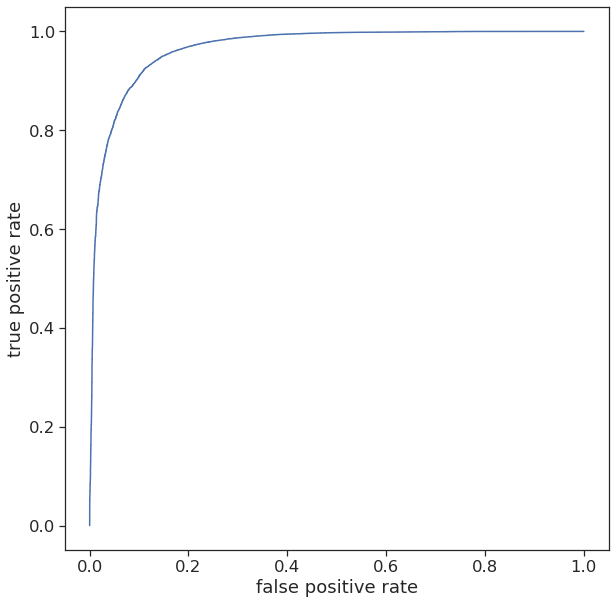

In [43]:
fpr, tpr, _ = roc_curve(pred["trace_type_bin"], pred["score_detection"])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(fpr, tpr)
ax.set_aspect("equal")

ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")

Optimal F1: 0.9625399988503325
Optimal F1 threshold: 0.728919


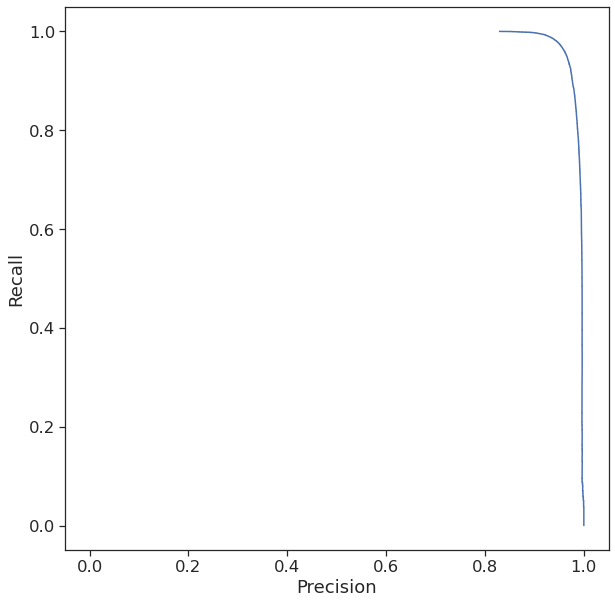

In [44]:
prec, recall, thr = precision_recall_curve(pred["trace_type_bin"], pred["score_detection"])

f1 = 2 * prec * recall / (prec + recall)
f1_threshold = thr[np.nanargmax(f1)]
best_f1 = np.max(f1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(prec, recall)
ax.set_aspect("equal")

ax.set_xlabel("Precision")
ax.set_ylabel("Recall")
ax.set_xlim(ax.get_ylim())

print("Optimal F1:", best_f1)
print("Optimal F1 threshold:", f1_threshold)

# Task 2 - Phase identification

In [45]:
pred = pd.read_csv(f"pred/{results_path}/{split}_task23.csv")
pred["phase_label_bin"] = pred["phase_label"] == "P"

Text(0, 0.5, 'true positive rate')

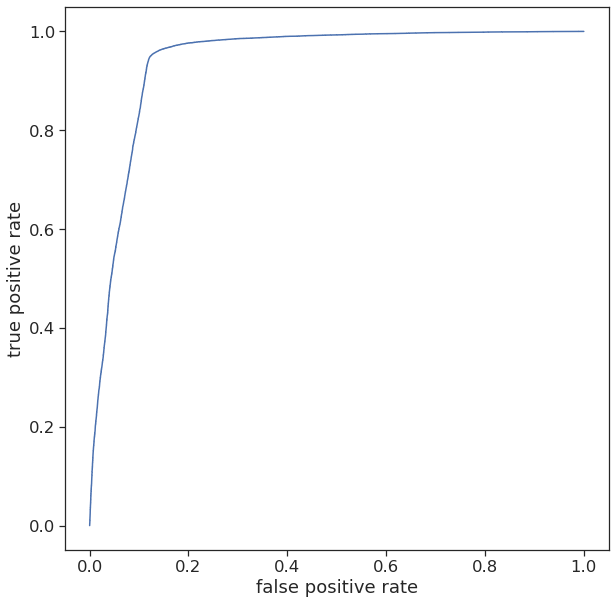

In [46]:
fpr, tpr, _ = roc_curve(pred["phase_label_bin"], pred["score_p_or_s"])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(fpr, tpr)
ax.set_aspect("equal")

ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")

Optimal F1: 0.8924950463545508
Optimal F1 threshold: 0.993137


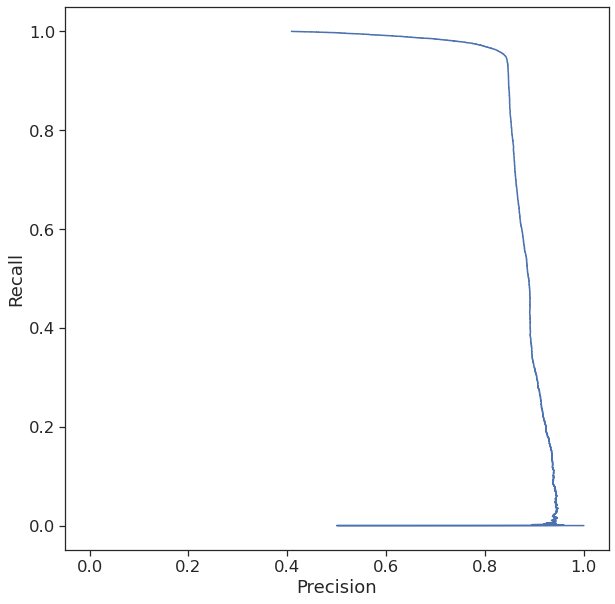

In [47]:
prec, recall, thr = precision_recall_curve(pred["phase_label_bin"], pred["score_p_or_s"])

f1 = 2 * prec * recall / (prec + recall)
f1_threshold = thr[np.nanargmax(f1)]
best_f1 = np.max(f1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.plot(prec, recall)
ax.set_aspect("equal")

ax.set_xlabel("Precision")
ax.set_ylabel("Recall")
ax.set_xlim(ax.get_ylim())

print("Optimal F1:", best_f1)
print("Optimal F1 threshold:", f1_threshold)

# Task 3 - Onset determination

In [48]:
pred = pd.read_csv(f"pred/{results_path}/{split}_task23.csv")

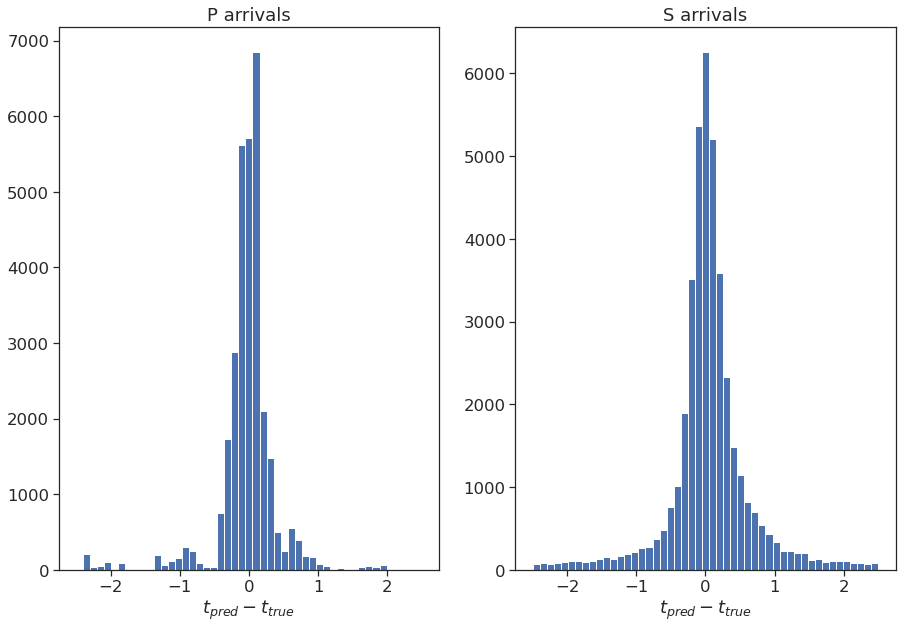

In [49]:
fig = plt.figure(figsize=(15, 10))
axs = fig.subplots(1, 2)

for i, phase in enumerate(["P", "S"]):
    ax = axs[i]
    ax.set_title(f"{phase} arrivals")
    pred_phase = pred[pred["phase_label"] == phase]
    pred_col = f"{phase.lower()}_sample_pred"
    
    diff = (pred_phase[pred_col] - pred_phase["phase_onset"]) / pred_phase["sampling_rate"]
    
    bins = np.linspace(-2.5, 2.5, 50)
    ax.hist(diff, bins=bins)
    ax.set_xlabel("$t_{pred} - t_{true}$")